# AI Generated Privacy
This project is meant to investigate the ability of LLMs to extract data privacy practices from mobile app code sources.

This purpose of this notebook is to store the analysis of the project for review and reproducibility.

### Import Libraries for Analysis

In [142]:
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

### Import Data

In [120]:
# Import list of all possible data privacy practices
with open('dpp_options.json', 'r') as file:
    dpps = json.load(file)
    
# Import both human and ai generated data privacy practice datasets
with open('dpp_human_gen.json', 'r') as file_human, open('dpp_ai_gen.json', 'r') as file_ai:
    apps_dpp_human = json.load(file_human)
    apps_dpp_ai = json.load(file_ai)


In [121]:
len(apps_dpp_ai)

22

### Check

In [131]:
for app in apps_dpp_human:
    diff = set(apps_dpp_human[app]).difference(dpps)
    if(len(diff) != 0):
       print(f"The app {app} has an element not in dpps:")
    
for app in apps_dpp_ai:
    diff = set(apps_dpp_ai[app]).difference(dpps)
    if(len(diff) != 0):
       print(f"The app {app} has an element not in dpps: {diff}")


The app org.videolan.vlc has an element not in dpps:
The app org.courville.nova has an element not in dpps:
The app org.kde.kdeconnect_tp has an element not in dpps:
The app ch.deletescape.lawnchair.plah has an element not in dpps:
The app rasel.lunar.launcher has an element not in dpps:
The app it.feio.android.omninotes has an element not in dpps:
The app com.ivy.wallet has an element not in dpps:
set()
set()


## Calculate Precision and Recall

In [145]:
precis = []
recall = []
f1_scr = []
# Go through each app
for app in apps_dpp_ai:
    dpp_true = []
    dpp_pred = []
    # Go through each dpp
    for dpp in dpps:
        # 1 if the dpp is truly used in the app, 0 if not
        dpp_true.append(dpp in apps_dpp_human[app])
        # 1 if the ai predicted the app used the dpp, 0 if not
        dpp_pred.append(dpp in apps_dpp_ai[app])
        
    
    # Get the precision and recall scores for the ai with this app
    precis.append(precision_score(dpp_true, dpp_pred, average='binary'))
    recall.append(recall_score(dpp_true, dpp_pred, average='binary'))
    f1_scr.append(f1_score(dpp_true, dpp_pred, average='binary'))

## Graph Results

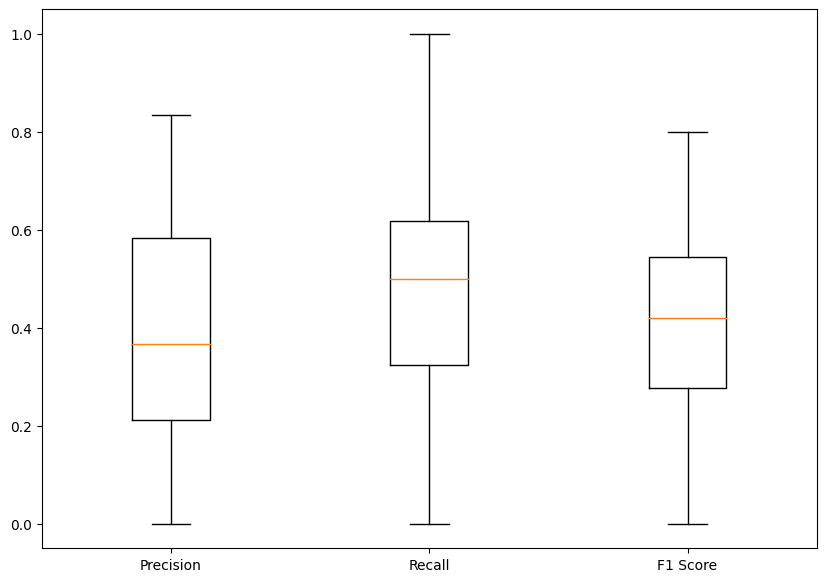

In [146]:
# Import libraries
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([precis, recall, f1_scr], labels=['Precision', 'Recall', "F1 Score"])
 
# show plot
plt.show()